# Module 1: The Watershed Transform

In today's lab, you'll be working with the watershed transform to identify WBC nuclei. You'll need to download 3 microscopy images from the BCCD Dataset at [the BCCD dataset Github](https://github.com/Shenggan/BCCD_Dataset/tree/master/BCCD/JPEGImages) (it doesn't matter what 3 you pick). 

### Task 1.1 Which images did you pick (just give the number), and in each image, which type of WBC do *you* believe is shown? (5 points)

(type answer here)

Next, you'll use the code below to analyze your 3 images. 

### Task 1.2 Add comments to the code so that you understand what it's actually doing. There is an existing comment, you'll need it for the next task (5 points) 

### Task 1.3 For each of your microscopy images, adjust the gradient value until the cell nucleus is correctly identified. Report the resultant gradient value for each image, and describe how accurate it is (in general terms - did it capture the entire nucleus? Did it capture extra parts of the image?). Using your knowledge of the watershed algorithm, describe how this process could potentially be automated to help automatically identify and count cells. (10 points)

(type analysis here)

In [1]:
'''
Preamble
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


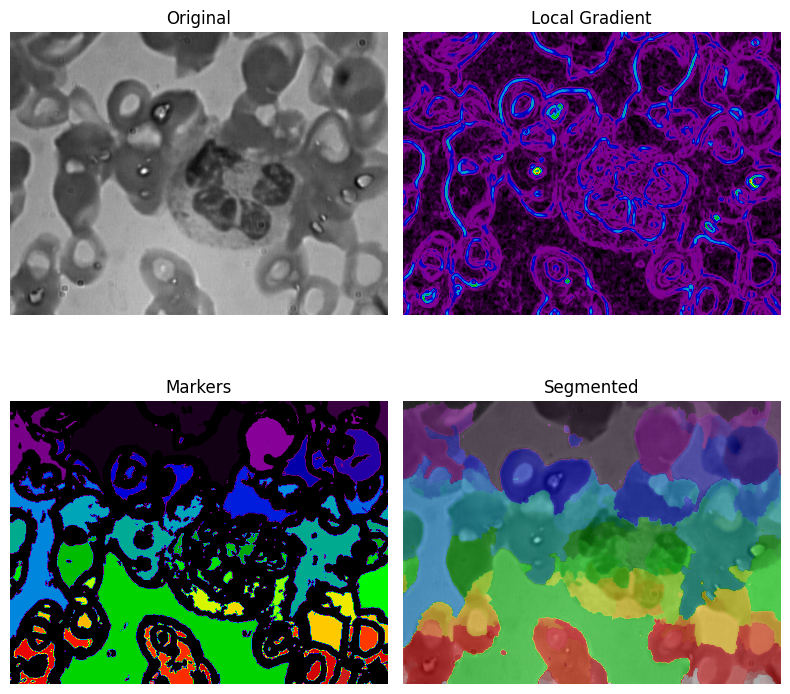

In [7]:
'''
watershed transform
Code modified from the scikit-image team, copyright 2013-2023
'''
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

# Missing modules
from skimage import color
from skimage import io

from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte


image = color.rgb2gray(io.imread('BloodImage_00000.jpg'))

denoised = rank.median(image, disk(2))


# define gradient value
grad_val = 10
markers = rank.gradient(denoised, disk(5)) < grad_val
markers = ndi.label(markers)[0]

gradient = rank.gradient(denoised, disk(2))

labels = watershed(gradient, markers)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# Module 2: Identifying WBC of different species

Now let's try your algorithm against a variety of species. Use the additional images in the `lab_7` folder on the class Github, and test your algorithm on white blood cells with slightly different morphology than human cells. 

### Task 2.1 How well did the algorithm perform? Why do you think this was the outcome? (5 points)

(type analysis here)

# Module 3: Homework 

### 3.1 Hill function (10 points)
Recall that we can calculate the probability of a receptor being bound as

$$ P^{(n)}_{bound} = \frac{x^n}{1+x^n} $$

 Find the number of binding sites needed for $P_{bound}=1$ at $x=1$. How realistic is this? (10 points)

In [ ]:
'''
Code for 3.1(c)
'''